In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [304]:
folders = ['TURRET_19_05_24_2022-05-26_E=228MeV_Current=150',
            'TURRET_20_17_08_2022-05-26_E=112MeV_Current=200',
            'TURRET_20220527_205013',
            'TURRET_20220527_205205',
            'TURRET_20220527_205357',
            'TURRET_20_37_21_2022-05-26_E=70MeV_Current=150',
            'TURRET_21_13_49_2022-05-26_E=228MeV_Current=200',
            'TURRET_21_48_09_2022-05-26_E=228MeV_Current=150']

file = './data_tracker/'+folders[1]+'/data.csv'

#import file
data = pd.read_csv(file)
data.columns=['event', 'id', 'x', 'y']
events = np.unique(data.event)

#cambio id in esadecimale
ex=[]
for i in list(data.id):
    ex.append(np.base_repr(i,16))
data.id=ex


#genero variablie con id per ogni evento
i=0
id_events = []
for i in events:
    id_events.append(np.unique(data[data.event==i].id))


# aggiungo colonna piano
plane = []
for i in data.id:
    if len(i)==2:
        plane.append('0')
    else:
        plane.append(i[0])
data['plane']=plane

# Vediamo cosa colpisce il primo piano e il chip centrale

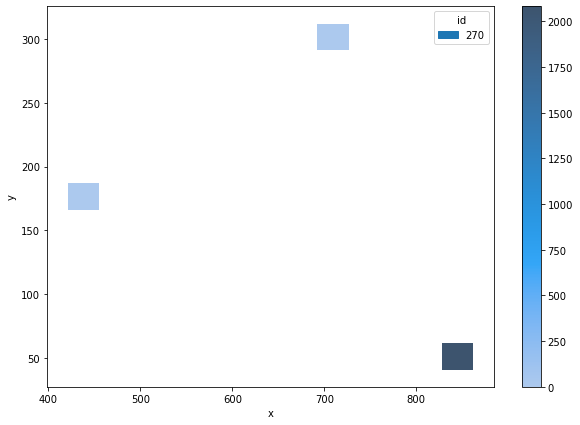

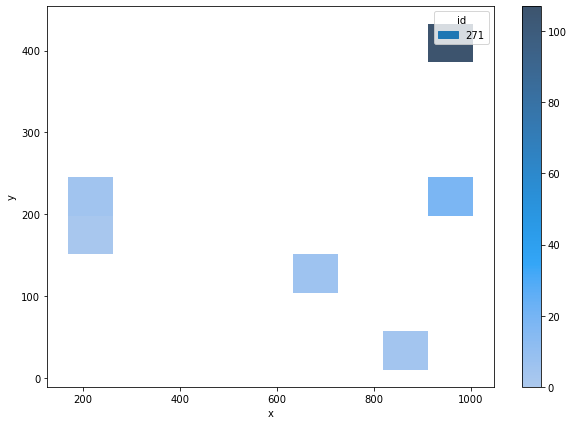

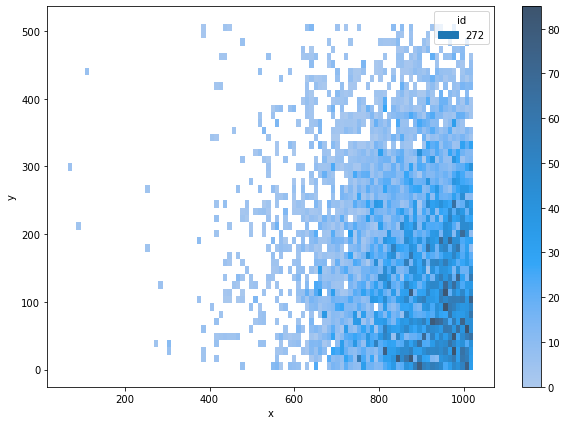

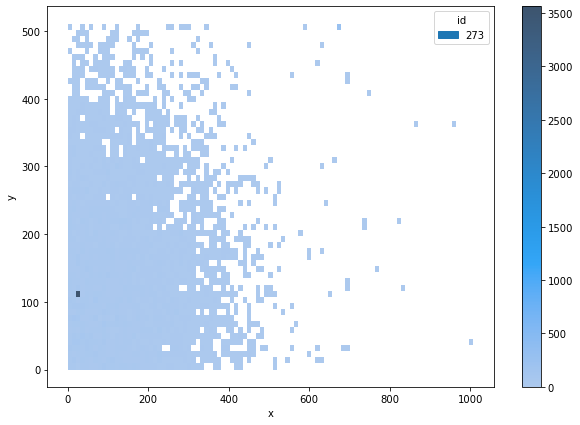

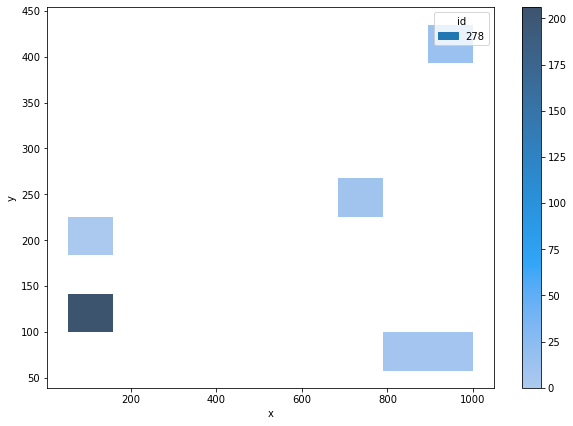

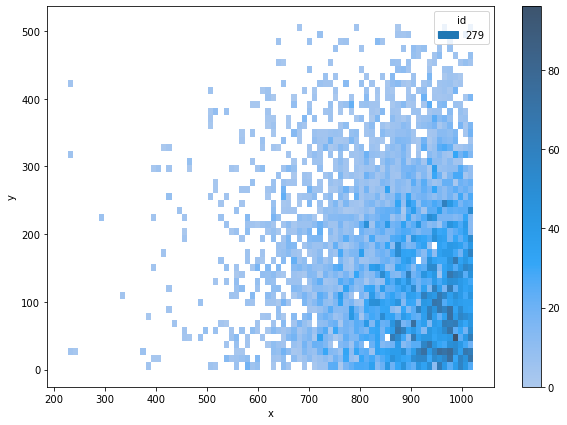

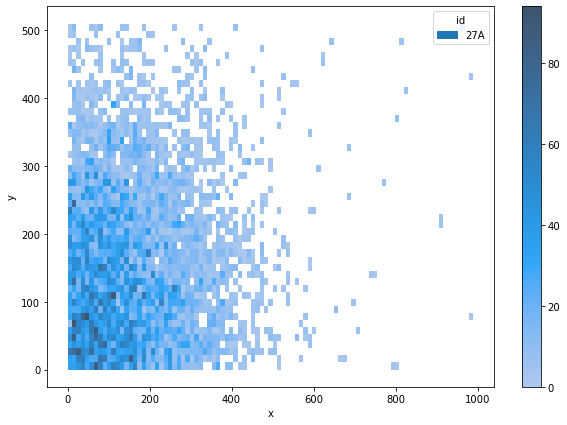

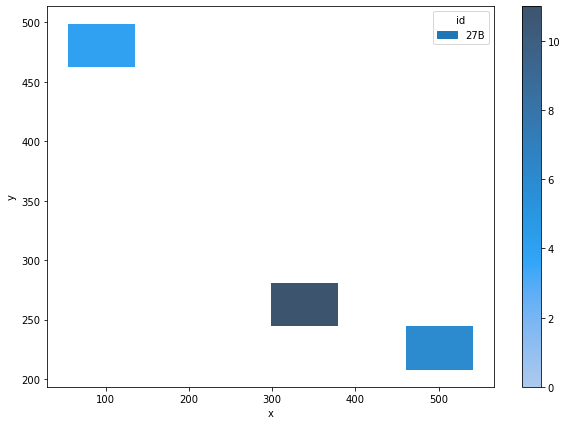

In [305]:
pl = data[data.plane=='2']


for i in np.unique(pl.id):
    plt.figure(figsize=(10,7))
    sns.histplot(pl[pl.id==i], x='x',y='y',hue='id',cbar=True)


Il fascio è sempre solo su 4 chip, eliminiamo tutti gli altri

In [311]:
chips=np.unique(data.id)
N=[]
for i in chips:
    N.append(data[data.id==i].shape[0])
    print(i, ' => ', N[-1])


170  =>  29
171  =>  21
172  =>  30865
173  =>  28835
178  =>  45
179  =>  24314
17A  =>  27052
17B  =>  14
17C  =>  20481
270  =>  2086
271  =>  142
272  =>  29961
273  =>  31570
278  =>  244
279  =>  25428
27A  =>  27261
27B  =>  21
70  =>  4
71  =>  44
72  =>  31805
73  =>  24386
78  =>  346
79  =>  19859
7A  =>  28810
7B  =>  27
7C  =>  8


In [313]:
#chip_to_remove=['71','78','7B','7C','170','171','178','17B','17C','270','271','278','27B']
#for i in chip_to_remove:
#    data = data.drop(data[data.id == i].index)
for i in range(len(chips)):
    if N[i]<3000:
        data = data.drop(data[data.id == chips[i]].index)


# Uso solo chip sul piano zero, per tutti gli eventi come si distribuiscono i clusters?

## PIANO 0

In [296]:
pl = data[data.plane=='1']

print('used pixels = ',np.unique(pl.id))
sumup = []
for i in np.unique(pl.event):
    for j in np.unique(pl[pl.event==i].id):
        t=pl[pl.event==i]
        t=t[t.id==j]
        sumup.append([j, t.shape[0], np.std(t.x), np.std(t.y)])

sumup = pd.DataFrame(sumup, columns=['id','N_pixel','x_std','y_std'])

used pixels =  ['172' '173' '179' '17A']


(0.0, 3.0)

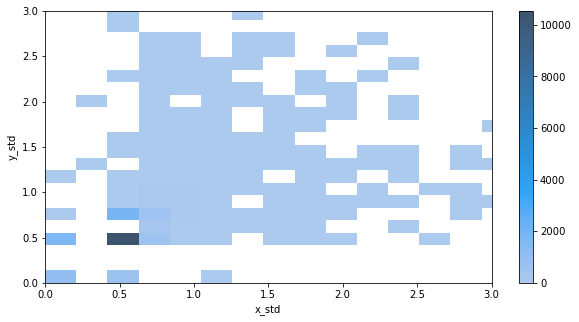

In [297]:
plt.figure(figsize=(10,5))
sns.histplot(sumup,x='x_std',y='y_std',bins=1000,cbar=True);
plt.xlim(0,3)
plt.ylim(0,3)
#plt.semilogy()

Taglio eventi con larga std => threshold a 3

In [301]:
T=2.5 #threshold
print('# of events to remove = ', sumup[sumup.x_std > T].shape[0]+sumup[sumup.y_std > T].shape[0]+sumup[sumup.N_pixel == 1].shape[0])
sumup = sumup.drop(sumup[sumup.x_std > T].index)
sumup = sumup.drop(sumup[sumup.y_std > T].index)
sumup = sumup.drop(sumup[sumup.N_pixel == 1].index)

# of events to remove =  0


mean number of pixels =  4.051368445941952 +- 1.8280126808104642


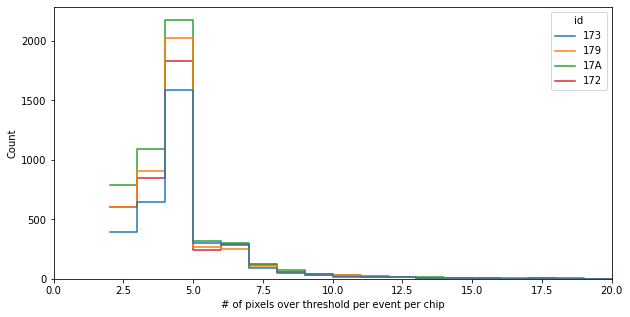

In [302]:
plt.figure(figsize=(10,5))
sns.histplot(sumup, x='N_pixel', hue='id',bins=30,element="step",fill=False);
plt.xlabel('# of pixels over threshold per event per chip')
plt.xlim(0,20)
#plt.semilogy()


print('mean number of pixels = ', np.mean(sumup.N_pixel), '+-', np.std(sumup.N_pixel))